# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

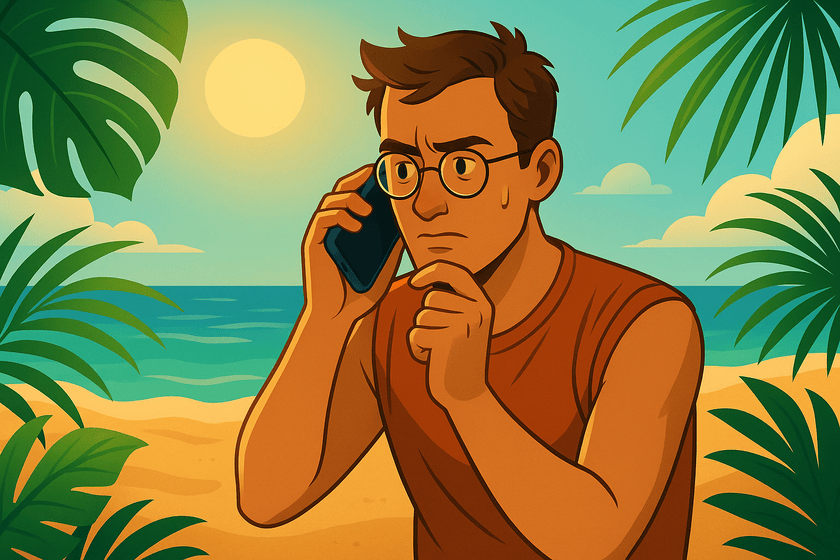

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Przetworzenie danych

### Wczytanie danych

In [254]:
titanic_df = pd.read_csv('titanic.csv', index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [255]:
# typy danych kolumn
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Wstępnie zakładam że wszystkie kolumny danych są potrzebne w czasie dalszej analizy może się to zmienić a i zmienne predykowane to oczywiście Survived

### zbadanie pustych wartości
Z info możemy wyczytać że kolumny Age, Fare, Cabin, Embarked mają wartości null

#### obsłużenie Age

In [256]:
titanic_df.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

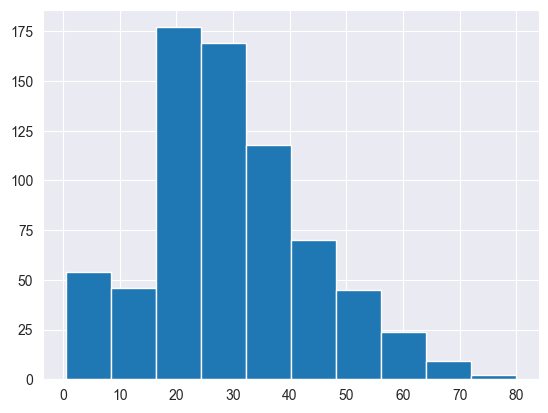

In [257]:
plt.hist(titanic_df.Age)

sprawdźmy czy dla płci wygląda to inaczej

(array([ 28.,  23., 109., 117.,  74.,  46.,  29.,  16.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

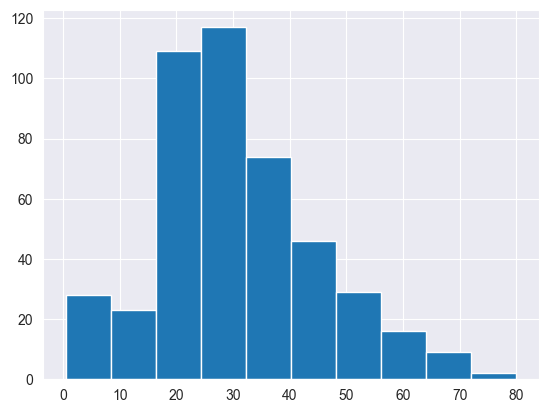

In [258]:
plt.hist(titanic_df.where(titanic_df['Sex'] == 'male').Age)

(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

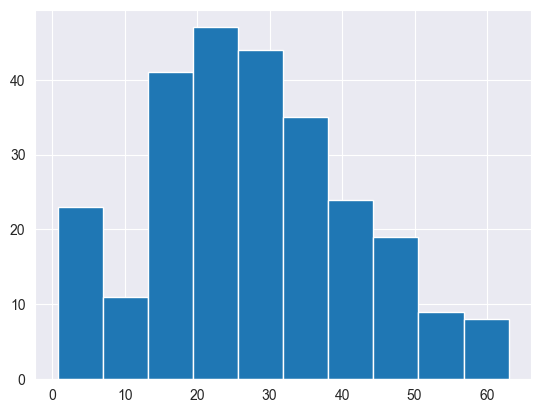

In [259]:
plt.hist(titanic_df.where(titanic_df['Sex'] == 'female').Age)

zastąpimy brakuję wartości wieku średnią w zależności od płci inną

In [260]:
titanic_df.loc[titanic_df['Sex'] == 'female', 'Age'] = \
    titanic_df.loc[titanic_df['Sex'] == 'female', 'Age'].fillna(
        titanic_df.loc[titanic_df['Sex'] == 'female', 'Age'].median()
    )

titanic_df.loc[titanic_df['Sex'] == 'male', 'Age'] = \
    titanic_df.loc[titanic_df['Sex'] == 'male', 'Age'].fillna(
        titanic_df.loc[titanic_df['Sex'] == 'male', 'Age'].median()
    )

In [261]:
titanic_df.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    27.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

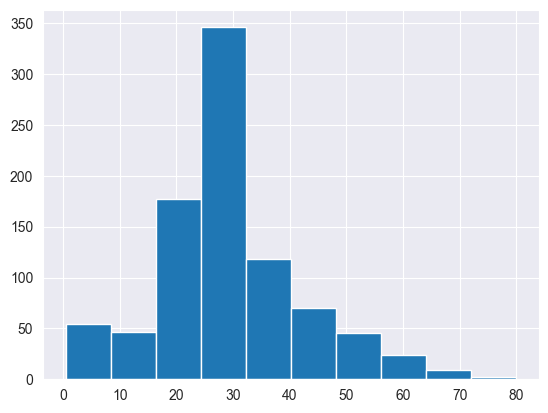

In [262]:
plt.hist(titanic_df.Age)

wiek obsłużony

#### obsłużenie Fare

In [263]:
titanic_df.Fare

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

(array([648.,  96.,  27.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

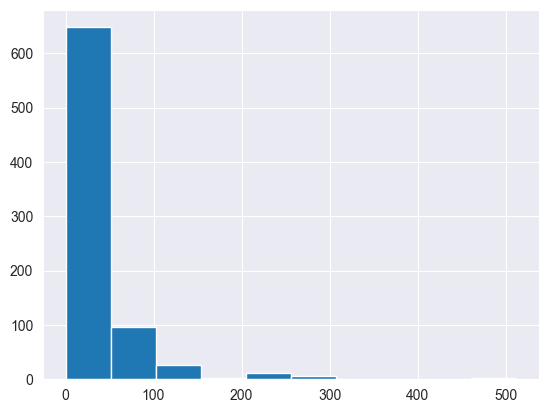

In [264]:
plt.hist(titanic_df.Fare, bins=10)

sprawdzę czy numer biletu i jego cena nie zależą od siebie (może jest szansa że bogatsi kupili bilet na starcie a biedni potem)

In [265]:
titanic_df[['Fare', 'Ticket']]

,Fare,Ticket
PassengerId,,
1,7.2500,A/5 21171
2,71.2833,PC 17599
3,7.9250,STON/O2. 3101282
4,53.1000,113803
5,8.0500,373450
...,...,...
887,13.0000,211536
888,30.0000,112053
889,23.4500,W./C. 6607


przeglądając dane nie widzę takiej prawidłowości więc w miejsce brakujących wartości wstawię średnią

In [266]:
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df.Fare.mean())

In [267]:
titanic_df.Fare

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

#### obsłużenie Cabin

In [268]:
titanic_df.Cabin

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

Nie jest to kolumna typu liczbowego więc jedyne co możemy zrobić to w puste miejsce wpisać "Not stated"

In [269]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna("Not Stated")
titanic_df['Cabin']

PassengerId
1      Not Stated
2             C85
3      Not Stated
4            C123
5      Not Stated
          ...    
887    Not Stated
888           B42
889    Not Stated
890          C148
891    Not Stated
Name: Cabin, Length: 891, dtype: object

In [271]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### obsłużenie Embarked

In [194]:
titanic_df.Embarked

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

<Axes: xlabel='Embarked'>

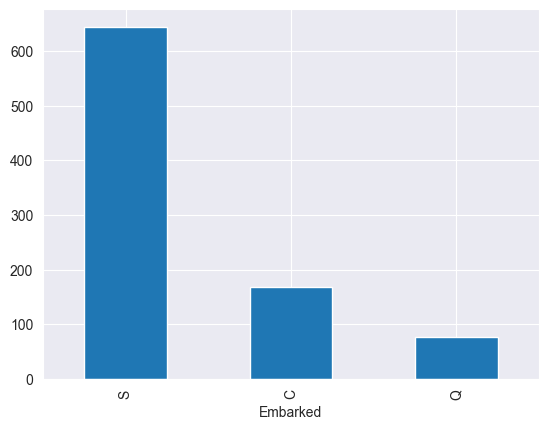

In [195]:
titanic_df['Embarked'].value_counts().plot(kind='bar')

Wartość S dominuje dlatego w puste miejsca wpisze właśnie nią

In [272]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")

In [273]:
# sprawdzenie czy nie ma null
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [274]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Stated,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Stated,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Stated,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Stated,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,Not Stated,S


żadna z kolumn nie ma wartości null sprawdzę teraz czy typy danych oraz wartości się zgadzają

### Sprawdzenie zgodnośći kolumn

zamienię survived na typ danych kategoryczny

In [275]:
titanic_df['Survived'] = titanic_df['Survived'].astype('category')

zobaczmy czy dla pcclass to samo możemy zrobić

<Axes: xlabel='Pclass'>

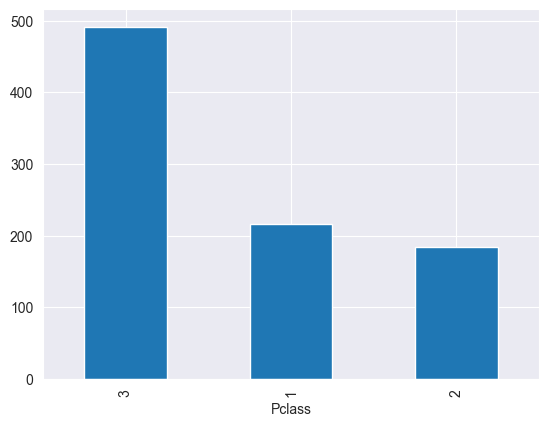

In [276]:
titanic_df['Pclass'].value_counts().plot(kind='bar')

In [277]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

In [278]:
# to samo z sex
titanic_df['Sex'] = titanic_df['Sex'].astype('category')

<Axes: xlabel='SibSp'>

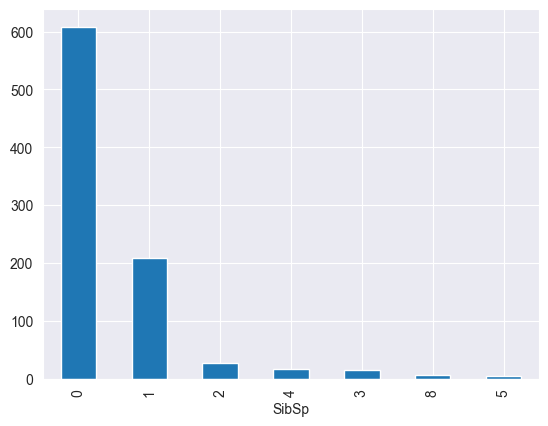

In [279]:
titanic_df['SibSp'].value_counts().plot(kind='bar')

In [280]:
titanic_df['SibSp'] = titanic_df['SibSp'].astype('category')

<Axes: xlabel='Parch'>

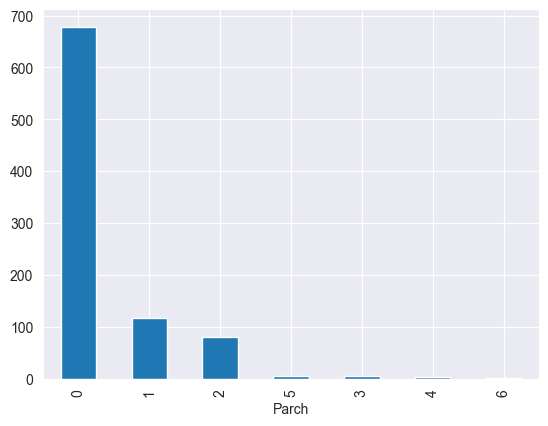

In [281]:
titanic_df['Parch'].value_counts().plot(kind='bar')

In [282]:
titanic_df['Parch'] = titanic_df['Parch'].astype('category')

In [283]:
titanic_df['Cabin'] = titanic_df['Cabin'].astype('category')

In [284]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     891 non-null    category
 10  Embarked  891 non-null    object  
dtypes: category(6), float64(2), object(3)
memory usage: 54.1+ KB


In [285]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Stated,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Stated,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Stated,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Stated,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,Not Stated,S


wstępnie uznaje że zbiór został sprawdzony i oczyszczony możemy przejść do dalszej analizy

### Nowe kolumny

przeglądając wartości cabin wpadłem na pomysł stworzenia kolumny department która by wyciągała z jakiego przedziału statku dane miejsce jest

In [286]:
titanic_df['Department'] = titanic_df['Cabin'].str[0] # Wartość 'N' jest po Not stated może się przyda

In [287]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Department
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Stated,S,N
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Stated,S,N
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Stated,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Stated,S,N
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,Not Stated,S,N


<Axes: xlabel='Department'>

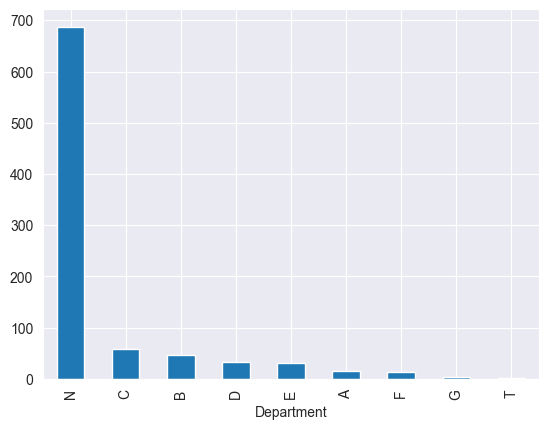

In [288]:
titanic_df['Department'].value_counts().plot(kind='bar')

Stworzyłbym też dodatkową zmienną kategoryczną dla dzieci, nastolatków, dorosłych i starców z przedziałami wieków załóżmy
- child (0 - 12)
- teenager (13 - 17)
- adult ( 18 - 60)
- elderly (60 - wzwyż) tu nie jestem pewien człowiek w 20 wieku pewnie był bliski śmierci w tym wieku może potem zmienie

In [289]:
titanic_df['AgeGroup'] = np.where(titanic_df['Age'] <= 12, 'child',
                          np.where(titanic_df['Age'] <= 17, 'teenager',
                          np.where(titanic_df['Age'] <= 60, 'adult', 'elderly')))

<Axes: xlabel='AgeGroup'>

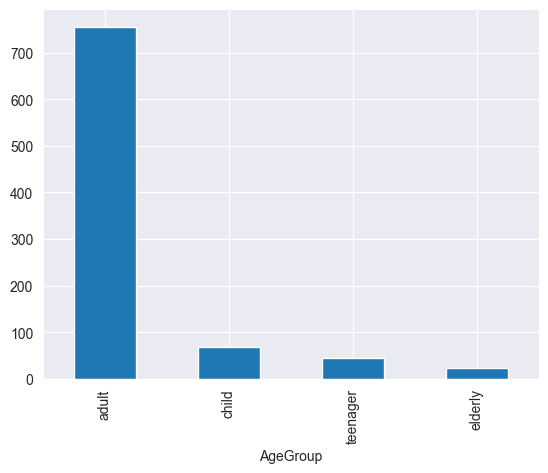

In [290]:
titanic_df['AgeGroup'].value_counts().plot(kind='bar')

Dodałbym kolumnę określającą cenę biletu Free: 0 Low: 0-10 Medium 11-100 High 100-wzwyż

In [291]:
titanic_df.Fare

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [292]:
titanic_df['TicketPrice'] = np.where(titanic_df['Fare'] == 0, 'free',
                          np.where(titanic_df['Fare'] <= 11, 'low',
                          np.where(titanic_df['Fare'] <= 100, 'medium', 'high')))

<Axes: xlabel='TicketPrice'>

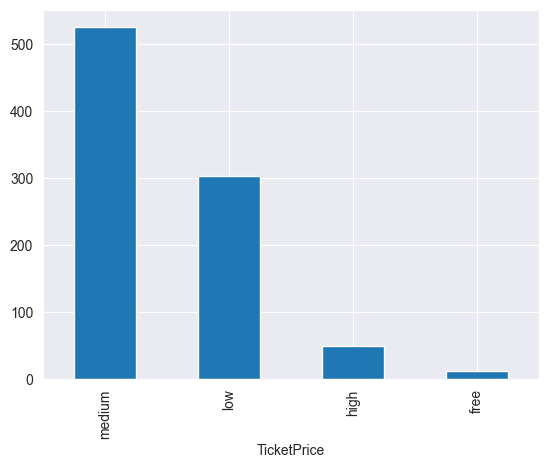

In [293]:
titanic_df['TicketPrice'].value_counts().plot(kind='bar')

### Kodowanie
Na każdej z naszych kolumn kategorycznych zastosujemy ordinal encoding

In [294]:
mapping_sex = {
    'female': 0,
    'male': 1,
}

mapping_embarked = {
    'S': 0,
    'C': 1,
    'Q': 2
}

mapping_department = {
    'N' : 0,
    'C': 1,
    'B': 2,
    'D': 3,
    'E': 4,
    'A': 5,
    'F': 6,
    'G': 7,
    'T': 8
}

mapping_age_group = {
    'child': 0,
    'teenager': 1,
    'adult': 2,
    'elderly': 3
}

mapping_ticket_price = {
    'free': 0,
    'low': 1,
    'medium': 2,
    'high': 3
}

titanic_df['Sex'] = titanic_df['Sex'].map(mapping_sex)
titanic_df['Embarked'] = titanic_df['Embarked'].map(mapping_embarked)
titanic_df['Department'] = titanic_df['Department'].map(mapping_department)
titanic_df['AgeGroup'] = titanic_df['AgeGroup'].map(mapping_age_group)
titanic_df['TicketPrice'] = titanic_df['TicketPrice'].map(mapping_ticket_price)

## Analiza Danych

### Dystrybucje danych
część z nich już widzieliśmy ale mogę wypisać dla każdej jeszcze raz

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

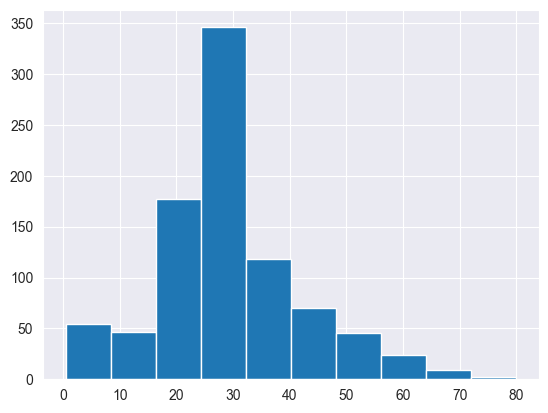

In [295]:
plt.hist(titanic_df.Age)

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

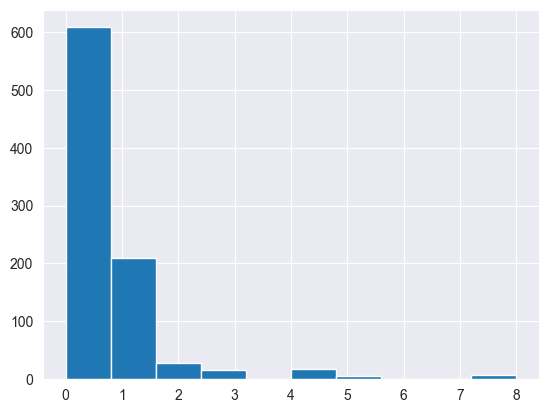

In [296]:
plt.hist(titanic_df.SibSp)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

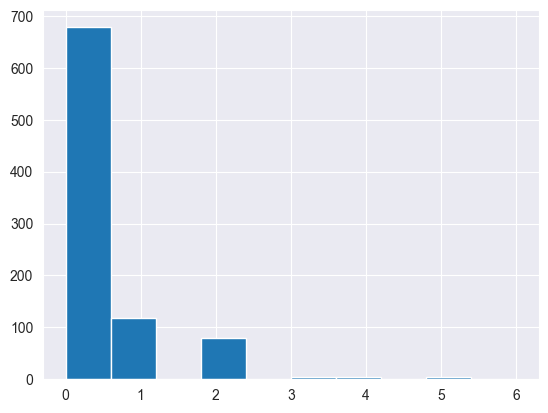

In [297]:
plt.hist(titanic_df.Parch)

(array([746.,  96.,  27.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

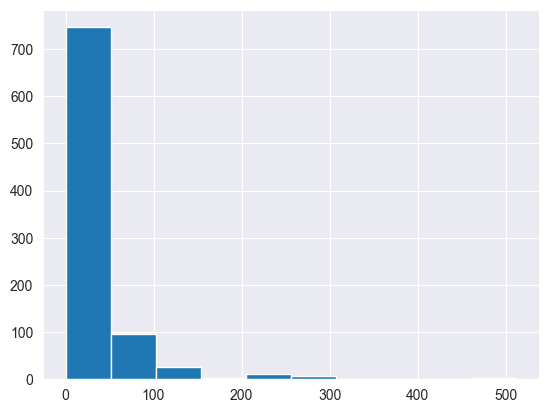

In [298]:
plt.hist(titanic_df.Fare)

(array([646.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0.,  77.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

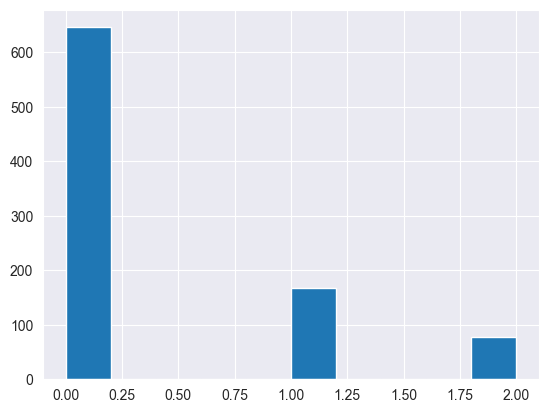

In [299]:
plt.hist(titanic_df.Embarked)

(array([687.,  59.,  47.,  33.,   0.,  32.,  15.,  13.,   4.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

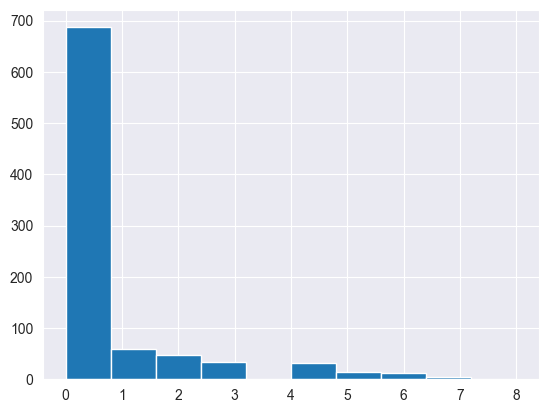

In [300]:
plt.hist(titanic_df.Department)

(array([ 69.,   0.,   0.,  44.,   0.,   0., 756.,   0.,   0.,  22.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

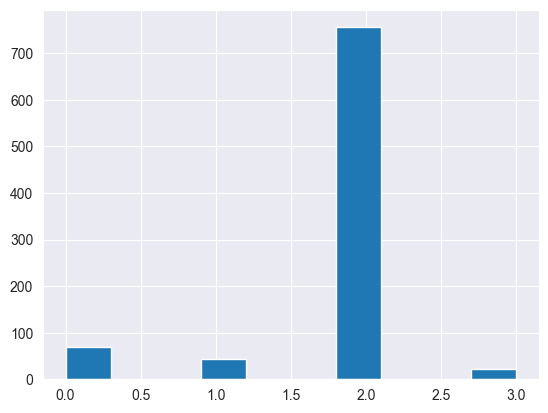

In [301]:
plt.hist(titanic_df.AgeGroup)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

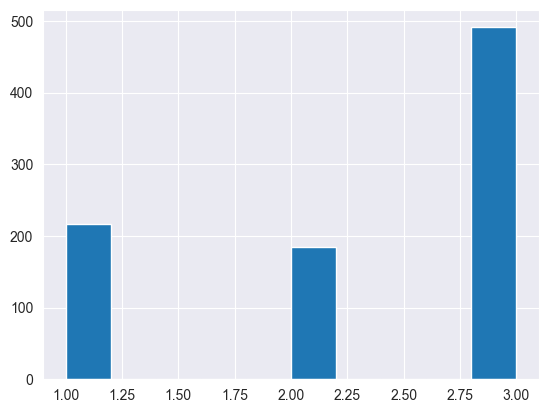

In [302]:
plt.hist(titanic_df.Pclass)

### Porównanie zmiennej predykowanej względem różnych wartości

#### porównanie survived i ageGroup

<Axes: xlabel='Survived', ylabel='AgeGroup'>

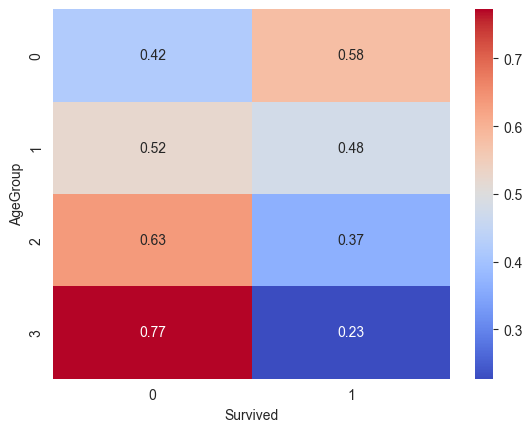

In [303]:
sns.heatmap(
    titanic_df.groupby("AgeGroup")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Możemy zauważyć że im starsza grupa osobowa ty mniejsza szansa na przeżycie (mapping)
'child': 0,
    'teenager': 1,
    'adult': 2,
    'elderly': 3


#### porównanie survived i pcclass

C:\Users\jakub\AppData\Local\Temp\ipykernel_1756\167197974.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby("Pclass")["Survived"]


<Axes: xlabel='Survived', ylabel='Pclass'>

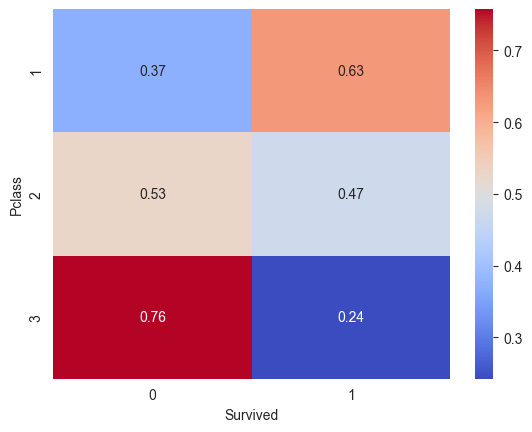

In [304]:
sns.heatmap(
    titanic_df.groupby("Pclass")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Możemy zauważyć że będąc w 3 klasie była największa szansa na śmierć za to będąc w 1 klasie była największa szansa przeżyć


#### porównanie survived i Embarked

<Axes: xlabel='Survived', ylabel='Embarked'>

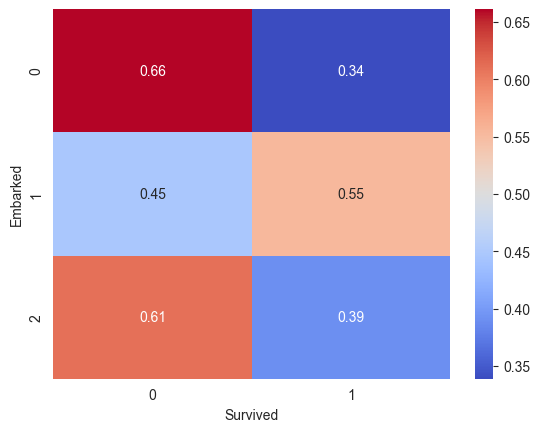

In [305]:
sns.heatmap(
    titanic_df.groupby("Embarked")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Możemy zauważyć że osoby z portu Quennstown mieli największą szansę na śmierć a wypływające z Southampton najmniejszą mapowanie = {
    'S': 0,
    'C': 1,
    'Q': 2
}, możemy sprawdzić jaka grupa wiekowa z Quennstown wypływała

(array([ 4.,  0.,  0.,  3.,  0.,  0., 68.,  0.,  0.,  2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

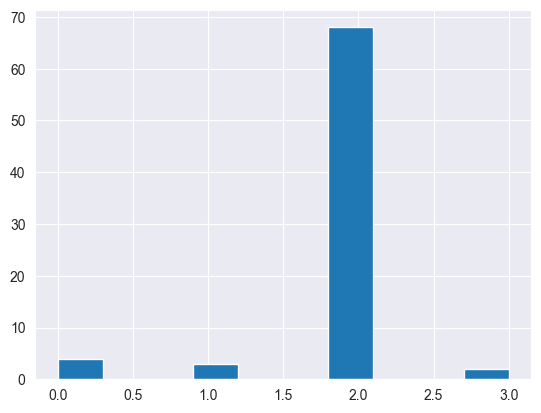

In [306]:
plt.hist(titanic_df['AgeGroup'].where(titanic_df['Embarked'] == 2))

widać że byli to głównie dorośli ( przez chwilę myślałem że może to byli w większości starcy ) co może wskazywać że ludzie z tamtego portu byli ulokowani w takim miejscu na titanicu z którego ciężko było uciec co możemy sprawdzić

(array([ 2.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0., 72.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

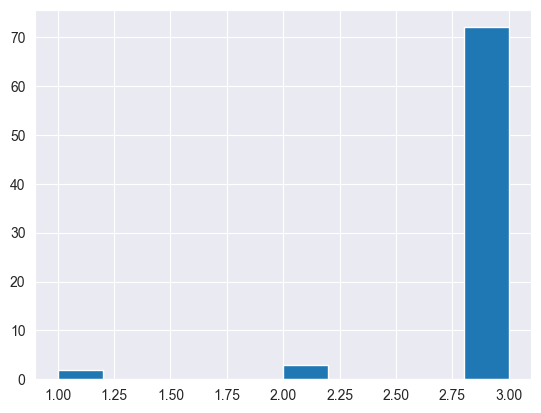

In [307]:
plt.hist(titanic_df['Pclass'].where(titanic_df['Embarked'] == 2))

Były to osoby z najgorszej klasy co wiele tłumaczy

(array([73.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

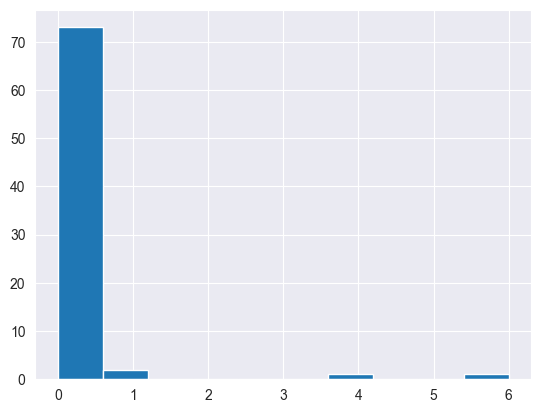

In [308]:
plt.hist(titanic_df['Department'].where((titanic_df['Embarked'] == 2)))

Dużo nam to nie dało większość osób była bez przezdiału niestety, a reszta z przedziału C E F zobaczmy czy jest zależność między przedziałem a szansą na śmierć
mapping_department = {
    'N' : 0,
    'C': 1,
    'B': 2,
    'D': 3,
    'E': 4,
    'A': 5,
    'F': 6,
    'G': 7,
    'T': 8
}

<Axes: xlabel='Survived', ylabel='Department'>

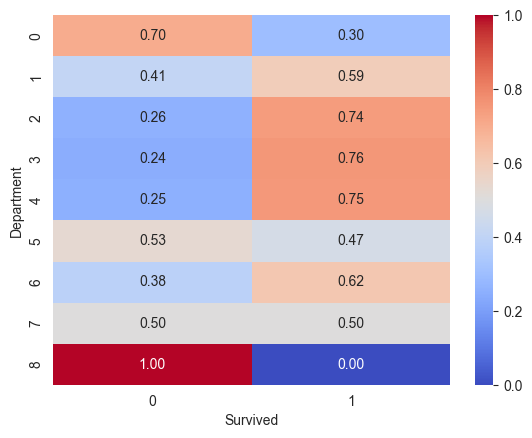

In [233]:
sns.heatmap(
    titanic_df.groupby("Department")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Widać jednak że ludzie bez podanego przedziału mieli wysoką szansę umrzeć tak samo jak ludzie z przedziału T z którego nie przeżył nikt a przedziały 2-4 były najbezpieczniejszymi. Możemy sprawdzić jaką klasę miały dane przedziały. mapping_department = {
    'N' : 0,
    'C': 1,
    'B': 2,
    'D': 3,
    'E': 4,
    'A': 5,
    'F': 6,
    'G': 7,
    'T': 8
}

<Axes: xlabel='Pclass', ylabel='Department'>

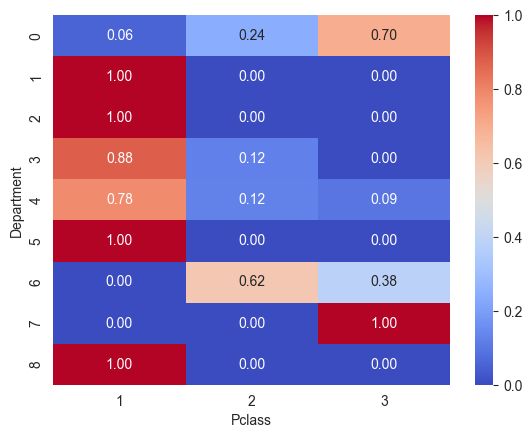

In [309]:
sns.heatmap(
    titanic_df.groupby("Department")["Pclass"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Widać że im wyższa klasa tym mniejszy problem z określenie przedziału oraz to że dla przedziałów 5,8,2,1 były wyłącznie dla pierwszej klasy co jest trochę dziwne bo ludzie z przedziału 8 'T' wszystkie umarły co jest ciekawym wyjątkiem od zasady jaką przyjąłem im jesteś bogatszy tym łatwiej przeżyć.

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

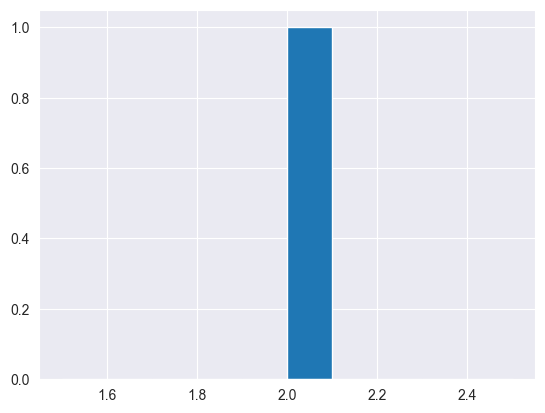

In [310]:
plt.hist(titanic_df['AgeGroup'].where((titanic_df['Department'] == 8)))

In [311]:
titanic_df[titanic_df['Department'] == 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Department,AgeGroup,TicketPrice
PassengerId,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",1,45.0,0,0,113784,35.5,T,0,8,2,2


Już wyjaśnione dlaczego było 100 procent ponieważ w tym przedziale była tylko jedna osoba

#### porównanie survived i parch

C:\Users\jakub\AppData\Local\Temp\ipykernel_1756\843826727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby("Parch")["Survived"]


<Axes: xlabel='Survived', ylabel='Parch'>

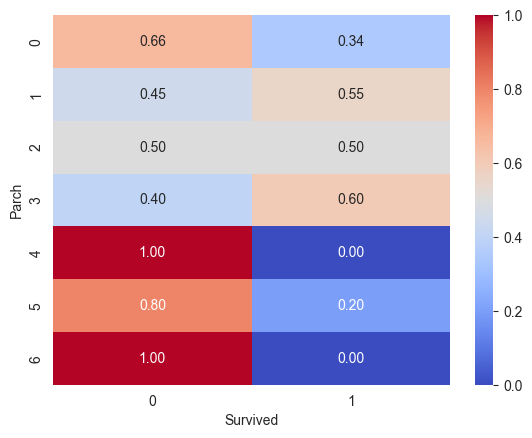

In [312]:
sns.heatmap(
    titanic_df.groupby("Parch")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Nie widać tutaj silnej zależności między większą liczbą dzieci i rodziców a szansą na śmierć biorąc pod uwagę że na statku byli w większości ludzie bez dzieci i rodziców

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

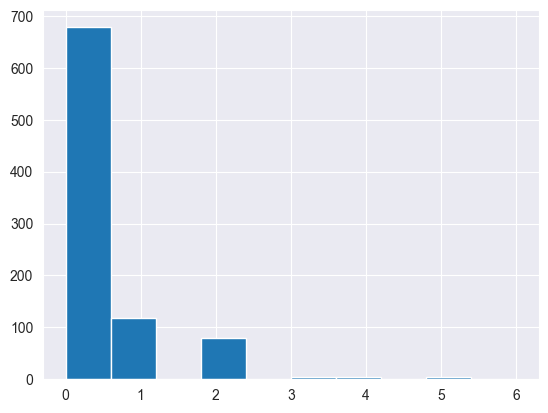

In [313]:
plt.hist(titanic_df['Parch'])

#### porównanie survived i sibsp

C:\Users\jakub\AppData\Local\Temp\ipykernel_1756\55730483.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby("SibSp")["Survived"]


<Axes: xlabel='Survived', ylabel='SibSp'>

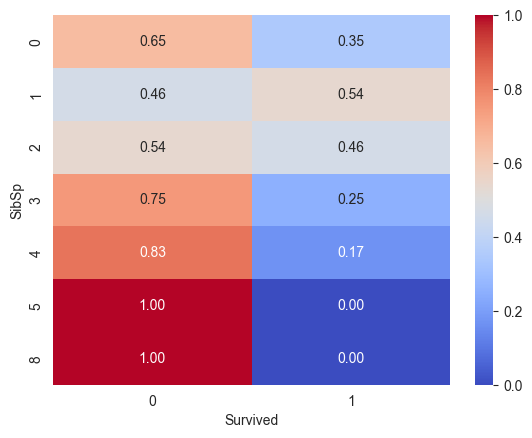

In [314]:
sns.heatmap(
    titanic_df.groupby("SibSp")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Nie widać tutaj silnej zależności między większą liczbą dzieci i rodziców a szansą na śmierć biorąc pod uwagę że na statku byli w większości ludzie bez dzieci i rodziców

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

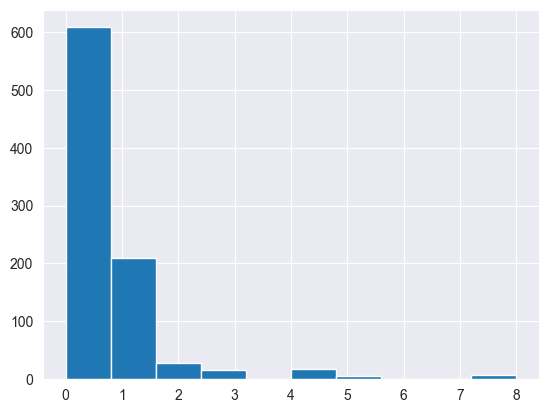

In [315]:
plt.hist(titanic_df['SibSp'])

#### Porównanie survived i Sex

C:\Users\jakub\AppData\Local\Temp\ipykernel_1756\3151560053.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby("Sex")["Survived"]


<Axes: xlabel='Survived', ylabel='Sex'>

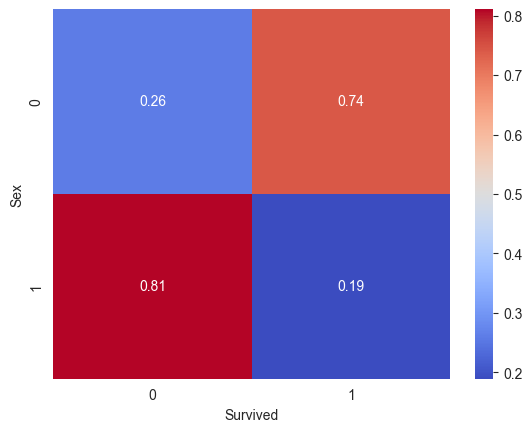

In [316]:
sns.heatmap(
    titanic_df.groupby("Sex")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Porównanie TicketPrice i Survived

<Axes: xlabel='Survived', ylabel='TicketPrice'>

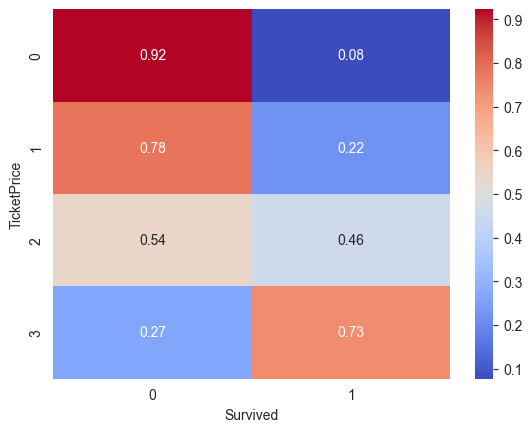

In [317]:
sns.heatmap(
    titanic_df.groupby("TicketPrice")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

Bogaci mieli największe prawdopodobieństwo przeżycia a ludzie płynący na gapę najmniejsze.

Porównanie Department i Survived

<Axes: xlabel='Survived', ylabel='Department'>

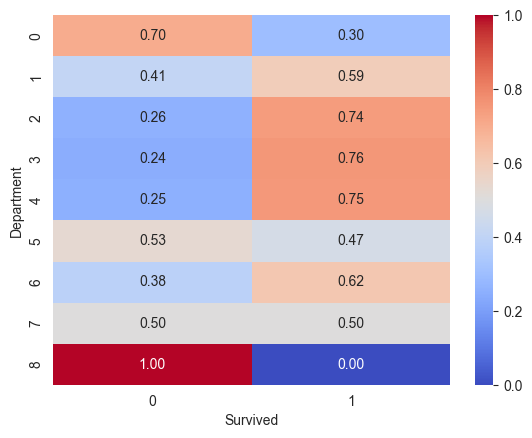

In [318]:
sns.heatmap(
    titanic_df.groupby("Department")["Survived"]
              .value_counts(normalize=True)
              .unstack(),
    annot=True, fmt=".2f", cmap="coolwarm"
)

# Wnioski
Po przejrzeniu danych mogę stwierdzić że:
- kobiety miały największe prawdopodobieństwo na przeżycie
- osoby starsze miały największe prawdopodobieństwo na śmierć
- osoby młodsze miały największe prawdopodobieństwo na przeżycie
- im wyższa klasa podróży oraz majątek danej osoby tym większe prawdopodobieństwo na przeżycie
- osoby które wsiadły z portu w Queenstown miały największe prawdopodobieństwo na śmierć a najmniejsze z Southampton.
- osoby które nie miały przydzielonej kabiny miały największe prawdopodobieństwo na śmierć porównując ich do innych przedziałów

Do tych reguł rzecz oczywista pojawiały się wyjątki ale były one najczęściej skrajne i nie było ich za dużo
